In [196]:
import os
import imp
import sympy as sp
from sympy.abc import x
import numpy as np
import pandas as pd
from numpy import pi
import matplotlib.pyplot as plt
from math import exp

In [317]:
df = pd.read_csv("C:\\Users\\Fabian\\Desktop\\ML\\2\\data.txt", delim_whitespace=True);

df['color'] = df.label.apply(lambda l: 'magenta' if l == 1 else 'cyan')
df['X'] = [np.array([1, x, y]) for (x, y) in zip(df.x1, df.x2)]


theta = np.array([0,0,0])
result = h(theta, df.X.tolist())
theta, MSE = linearClassification(df.X.tolist(), df.label, alpha=0.05, epsilon=0.0005);

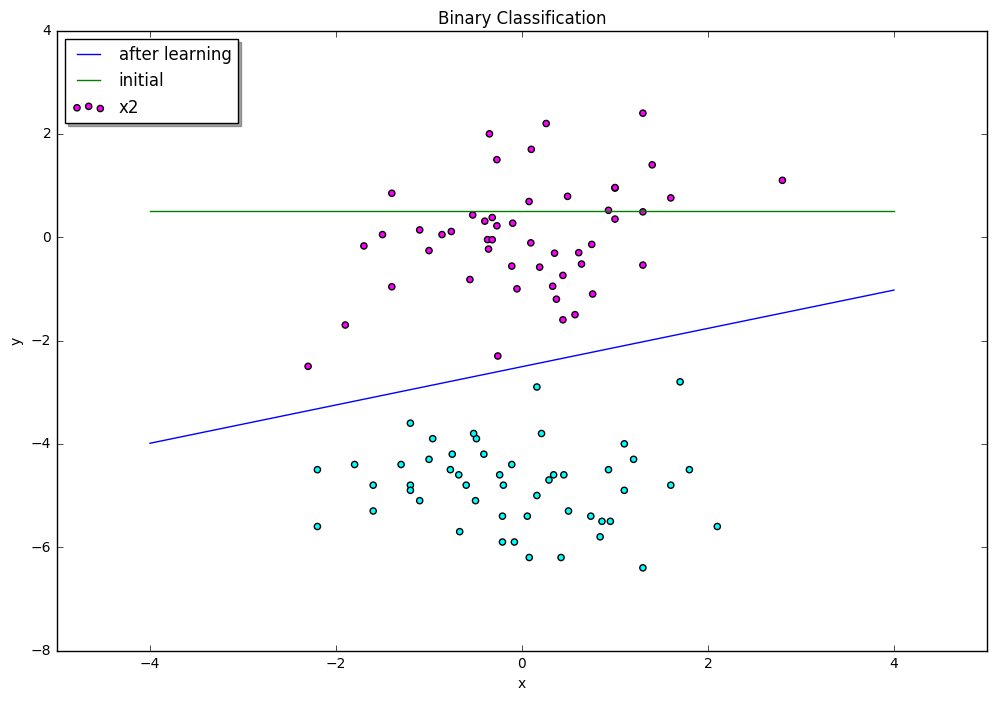

In [320]:
f = lambda x: -1*(theta[0] + theta[1]*x)/theta[2];
X = np.linspace(-4, 4, num=100); 

fig, ax = plt.subplots(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k');
ax.scatter(df.x1, df.x2, c=df.color);

ax.plot(X, [i for i in map(f, X)],label='after learning');
ax.plot(X,result,label='initial');

ax.set_xlabel('x')
ax.set_ylabel('y')
legend = ax.legend(loc='upper left', shadow=True)
ax.set_title('Binary Classification')
plt.show()

In [305]:
def h(theta , x):
    return 1/(1+np.exp(-np.sum(theta*x, axis=1)));


In [306]:
def linearClassification(x, lable, alpha=0.005, epsilon=0.001, max_iter=10000):
    theta = np.zeros(3);
    MSE = 100;
    while MSE>epsilon:
        summ =  np.dot((lable - h(theta,x)),x);
        theta = theta + alpha * summ;
        MSE = np.sum(np.power(lable - h(theta,x),2))/len(x);
    return theta, MSE;
    